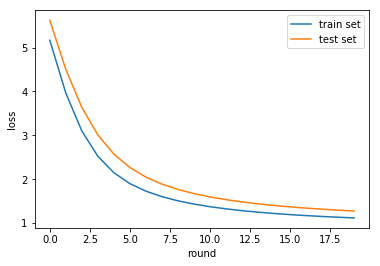

In [1]:
import numpy as np
import sklearn as sk
import pylab
import matplotlib.pylab as plt
import random
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_svmlight_file


###############################################################################

"""
@INPUT:
    R     : a matrix to be factorized, dimension N x M
    P     : an initial matrix of dimension N x K
    Q     : an initial matrix of dimension M x K
    K     : the number of latent features
    steps : the maximum number of steps to perform the optimisation
    alpha : the learning rate
    beta  : the regularization parameter
@OUTPUT:
    the final matrices P and Q
"""
def matrix_factorization(R, T, K=2, steps=5000, alpha=0.0002, beta=0.02):
    N = len(R)
    M = len(R[0])
    #K = 2
    error1 = []
    error2 = []

    P = np.random.rand(N,K)
    Q = np.random.rand(M,K)

    Q = Q.T
    for step in range(steps):
        #compute gradient
        for i in range(len(R)):
            for j in range(len(R[i])):
                if R[i][j] > 0:
                    eij = R[i][j] - np.dot(P[i,:],Q[:,j])
                    for k in range(K):
                        P[i][k] = P[i][k] + alpha * (2 * eij * Q[k][j] - beta * P[i][k])
                        Q[k][j] = Q[k][j] + alpha * (2 * eij * P[i][k] - beta * Q[k][j])
        eR = np.dot(P,Q)
        #compute loss of train set
        e = 0
        for i in range(len(R)):
            for j in range(len(R[i])):
                if R[i][j] > 0:
                    e = e + pow(R[i][j] - np.dot(P[i,:],Q[:,j]), 2)
                    for k in range(K):
                        e = e + (beta/2) * ( pow(P[i][k],2) + pow(Q[k][j],2) )
        e = e / 80000
        error1.append(e)
        #eR = eR - T
        #error2.append(eR.sum()/20000)
        #compute loss of test set
        e = 0
        for i in range(len(R)):
            for j in range(len(R[i])):
                if T[i][j] > 0:
                    e = e + pow(T[i][j] - np.dot(P[i,:],Q[:,j]), 2)
                    for k in range(K):
                        e = e + (beta/2) * ( pow(P[i][k],2) + pow(Q[k][j],2) )
        e = e / 20000
        error2.append(e)
        #print('this {0}, error = {1}'.format(step,e))
        if e < 0.001:
            break
    return P, Q.T, error1,error2

###############################################################################

#read file and transform into matrix
def load_data(filename):
    matrix = np.zeros((943,1682))
    for line in open(filename):
        temp = line.split('\t')
        user = int(temp[0])
        item = int(temp[1])
        rank = int(temp[2])
        matrix[user-1,item-1]=rank
    
    return matrix


#display the plot
def plot_data(error1,error2):
    n = range(len(error1))
    pylab.plot(n,error1,label='train set')
    pylab.plot(n,error2,label='test set')
    pylab.xlabel('round')
    pylab.ylabel('loss')
    plt.legend()
    pylab.show()


if __name__ == "__main__":
    train1 = load_data('./ml-100k/u1.base')
    test1 = load_data('./ml-100k/u1.test')
    #train2 = load_data('./ml-100k/u2.base')
    #test2 = load_data('./ml-100k/u2.test')
    #train3 = load_data('./ml-100k/u3.base')
    #test3 = load_data('./ml-100k/u3.test')
    #train4 = load_data('./ml-100k/u4.base')
    #test4 = load_data('./ml-100k/u4.test')
    #train5 = load_data('./ml-100k/u5.base')
    #test5 = load_data('./ml-100k/u5.test')

    #print(number)
    Q1, R1 ,error1,error2 = matrix_factorization(train1,test1,5,20)
    plot_data(error1,error2)
